<a href="https://colab.research.google.com/github/hojun1105/git-practice/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터가져오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


In [ ]:
drive.mount('/content/drive')
train=pd.read_csv("/content/drive/MyDrive/package/train.csv")
test=pd.read_csv("/content/drive/MyDrive/package/test.csv")

Mounted at /content/drive


# EDA

  ## columns
datetime - hourly date + timestamp  

season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

holiday - whether the day is considered a holiday 

workingday - whether the day is neither a weekend nor holiday

weather <br>
1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>
          2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
          3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
          4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

temp - temperature in Celsius - 온도

atemp - "feels like" temperature in Celsius - 체감온도

humidity - relative humidity -연휴

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

In [ ]:
train.info(), test.info() # train으로 전처리 하고나서 test를 이용

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 n

(None, None)

In [ ]:
# 결측치 확인 - 없음
print(train.isnull().sum(),test.isnull().sum(),sep='\n')

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
humidity      0
windspeed     0
dtype: int64


In [ ]:
train.datetime # object data -> integer : 중간에 분리해주는 요소를 모두 합쳐서 하나의 숫자로

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [ ]:
train.season.value_counts() # 군집형 데이터 봄,여름,가을,겨울

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [ ]:
train.holiday.value_counts() # holiday(0) = workingday + weekend

0    10575
1      311
Name: holiday, dtype: int64

In [ ]:
train.workingday.value_counts() # workingday(0)

1    7412
0    3474
Name: workingday, dtype: int64

- holiday 1 workingday 2 weekend 3 
이런 형식으로 데이터 만들어보고싶음

In [ ]:
train[train.iloc[:,2]==0] 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


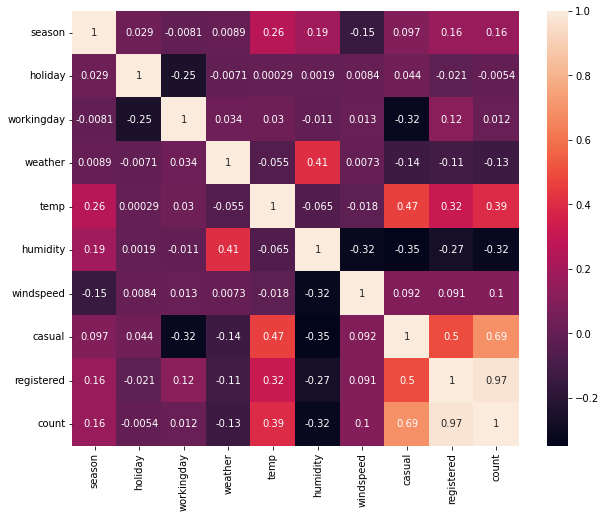

In [ ]:
train_cor=train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(train_cor,annot=True)

In [ ]:
train.weather.value_counts() # 군집형 데이터 -> onehot encoding 사용? 1:맑음 0:맑지않음 (2,3,4 포함)

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [ ]:
train[['weather']]

,weather
0,1
1,1
2,1
3,1
4,1
...,...
10881,1
10882,1
10883,1
10884,1


In [ ]:
train[['atemp','temp']] # atemp=temp+num -> temp로 통일
train.drop('atemp',axis=1,inplace=True)
test.drop('atemp',axis=1,inplace=True)

In [ ]:
train.windspeed.value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: windspeed, dtype: int64

In [ ]:
train.columns, test.columns

(Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
        'humidity', 'windspeed', 'casual', 'registered', 'count'],
       dtype='object'),
 Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
        'humidity', 'windspeed'],
       dtype='object'))

In [ ]:
train['season'].value_counts() 

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

 - train, test 데이터 분석 : train - test => casual, registered, count 


In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,0,1,1


In [ ]:
train.datetime

In [ ]:
train.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [ ]:
train.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [ ]:
test.datetime = test['datetime'].astype('datetime64')

In [ ]:
test.datetime

0      2011-01-20 00:00:00
1      2011-01-20 01:00:00
2      2011-01-20 02:00:00
3      2011-01-20 03:00:00
4      2011-01-20 04:00:00
               ...        
6488   2012-12-31 19:00:00
6489   2012-12-31 20:00:00
6490   2012-12-31 21:00:00
6491   2012-12-31 22:00:00
6492   2012-12-31 23:00:00
Name: datetime, Length: 6493, dtype: datetime64[ns]

In [ ]:
test1=test.copy()

In [ ]:
train1=train.copy()
train1

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,61,6.0032,12,117,129


In [ ]:
train1['datetime']=train1.datetime.astype('datetime64')

In [ ]:
train1.drop(['casual','registered'],axis=1,inplace=True)

In [ ]:
train1.windspeed.value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: windspeed, dtype: int64

In [ ]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
humidity      0
windspeed     0
count         0
year          0
month         0
hour          0
dtype: int64

In [ ]:
def to_integer(datetime):
  return 10000*datetime.year+100*datetime.month+datetime.day

datetime_int=train['datetime'].apply(lambda x:to_integer(x))
train['datetime']=pd.Series(datetime_int)

In [ ]:
train

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count,year,month,hour
0,20110101,1,0,0,1,9.84,81,0.0000,16,2011,1,0
1,20110101,1,0,0,1,9.02,80,0.0000,40,2011,1,1
2,20110101,1,0,0,1,9.02,80,0.0000,32,2011,1,2
3,20110101,1,0,0,1,9.84,75,0.0000,13,2011,1,3
4,20110101,1,0,0,1,9.84,75,0.0000,1,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,20121219,4,0,1,1,15.58,50,26.0027,336,2012,12,19
10882,20121219,4,0,1,1,14.76,57,15.0013,241,2012,12,20
10883,20121219,4,0,1,1,13.94,61,15.0013,168,2012,12,21
10884,20121219,4,0,1,1,13.94,61,6.0032,129,2012,12,22


 - 특성 추가 datetime 대신이용

In [ ]:
train1.info()
train1['year']=train1['datetime'].dt.year
train1['month']=train1['datetime'].dt.month
train1['hour']=train1['datetime'].dt.hour

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   humidity    10886 non-null  int64         
 7   windspeed   10886 non-null  float64       
 8   count       10886 non-null  int64         
 9   year        10886 non-null  int64         
 10  month       10886 non-null  int64         
 11  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(9)
memory usage: 1020.7 KB


### 계절별 특성의 분포

In [ ]:
t=train1.groupby('season',as_index=False)

<BarContainer object of 4 artists>

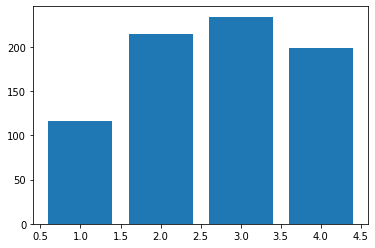

In [ ]:
plt.bar(t.mean()['season'],t.mean()['count']) 

<BarContainer object of 4 artists>

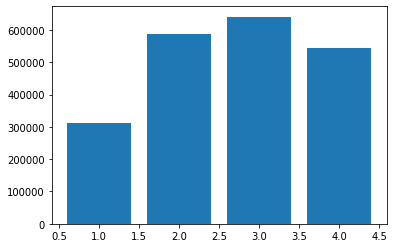

In [ ]:
plt.bar(t.sum()['season'],t.sum()['count']) # 1.여름 2.봄 3. 가을

In [ ]:
train1['datetime'].values

array(['2011-01-01T00:00:00.000000000', '2011-01-01T01:00:00.000000000',
       '2011-01-01T02:00:00.000000000', ...,
       '2012-12-19T21:00:00.000000000', '2012-12-19T22:00:00.000000000',
       '2012-12-19T23:00:00.000000000'], dtype='datetime64[ns]')

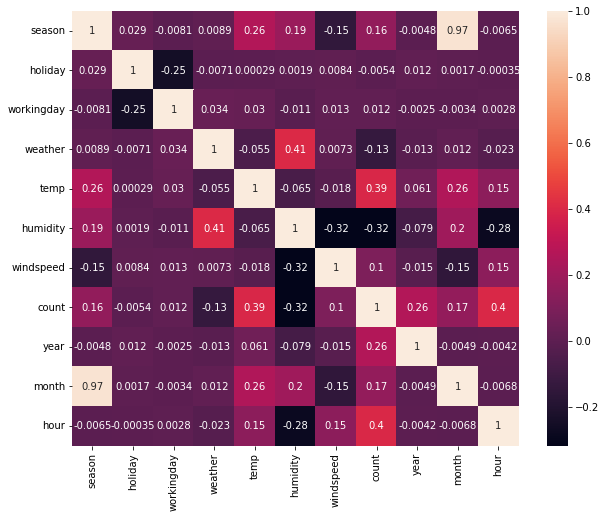

In [ ]:
#특성간 상관관계 - count와 제일 연관성 이 깊은 특성은 +hour,+temp,-humidity 
cor_train1=train1.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor_train1,annot=True)

In [ ]:
#columns - year, month,  hour, holiday, workingday, season, weather, windspeed, temp, humadity, count
#weather - 1->1 ,2,3,4->0
#windspeed - 이상치 제거 
#humadity - 이상치 제거
#temp - 이상치 제거 

In [ ]:
train.temp.value_counts()

14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
17.22    356
13.12    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68    170
6.56     146
33.62    130
5.74     107
7.38     106
31.98     98
34.44     80
35.26     76
4.92      60
36.90     46
4.10      44
37.72     34
36.08     23
3.28      11
0.82       7
38.54      7
39.36      6
2.46       5
1.64       2
41.00      1
Name: temp, dtype: int64

In [ ]:
th=train1.groupby('hour')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
train=pd.read_csv("/content/drive/MyDrive/package/train.csv")
test=pd.read_csv("/content/drive/MyDrive/package/test.csv")
##EDA)

#누락값 확인
#train.isnull().sum()  
#train.isnull().sum()

#특성간 상관관계
#cor_train=train.corr()
#plt.figure(figsize=(10,8))
#sns.heatmap(cor_train,annot=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#datetime (object -> datetime64)
train.datetime = train['datetime'].astype('datetime64')
test.datetime = test['datetime'].astype('datetime64')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
#atemp 제거
train.drop('atemp',axis=1,inplace=True)
test.drop('atemp',axis=1,inplace=True)


In [ ]:
#train셋에서 casual registered 제거
train.drop(['casual','registered'],axis=1,inplace=True)

#train셋에 datetime 특성 분할후 추가
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['hour']=train['datetime'].dt.hour
train['dayofweek']=train['datetime'].dt.dayofweek
test['year']=test['datetime'].dt.year
test['month']=test['datetime'].dt.month
test['hour']=test['datetime'].dt.hour
test['dayofweek']=test['datetime'].dt.dayofweek

In [ ]:
#이상치 확인 후 제거
def get_outlier(df=None, column=None):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 -q1
  outlier_idx  = df[column][(df[column] < q1 - (1.5 * iqr)) | (df[column] > q3 + (1.5 * iqr))].index
  return outlier_idx

outlier_idx = get_outlier(df=train, column='windspeed')
train.drop(outlier_idx, axis=0, inplace=True)
outlier_idx1 = get_outlier(df=train,column='humidity')
train.drop(outlier_idx1, axis=0, inplace=True)

outlier_idx2 = get_outlier(df=test, column='windspeed')
test.drop(outlier_idx2, axis=0, inplace=True)
outlier_idx3 = get_outlier(df=test,column='humidity')
test.drop(outlier_idx3, axis=0, inplace=True)

In [ ]:
outlier_idx = get_outlier(df=train, column='windspeed')

outlier_idx1 = get_outlier(df=train,column='humidity')

train.drop(outlier_idx, axis=0, inplace=True)
train.drop(outlier_idx1, axis=0, inplace=True)

outlier_idx2 = get_outlier(df=test, column='windspeed')

outlier_idx3 = get_outlier(df=test,column='humidity')

test.drop(outlier_idx2, axis=0, inplace=True)
test.drop(outlier_idx3, axis=0, inplace=True)

In [ ]:
train

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count,year,month,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0000,16,2011,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0000,40,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0000,32,2011,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0000,13,2011,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0000,1,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,50,26.0027,336,2012,12,19,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,57,15.0013,241,2012,12,20,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,61,15.0013,168,2012,12,21,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,61,6.0032,129,2012,12,22,2


In [ ]:
#datetime (datetime64->int)
def to_integer(datetime):
  return 10000*datetime.year+100*datetime.month+datetime.day

datetime_int=train['datetime'].apply(lambda x:to_integer(x))
train['datetime']=pd.Series(datetime_int)
datetime_int=test['datetime'].apply(lambda x:to_integer(x))
test['datetime']=pd.Series.apply(lambda x:to_integer(x))

#train에 weather특성 군집화하기
train['weather_']= np.where(train['weather']==1, 1, 0)
train.drop('weather',axis=1,inplace=True)


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
train=pd.read_csv("/content/drive/MyDrive/package/train.csv")
test=pd.read_csv("/content/drive/MyDrive/package/test.csv")
##EDA)

#누락값 확인
#train.isnull().sum()  
#train.isnull().sum()

#특성간 상관관계
#cor_train=train.corr()
#plt.figure(figsize=(10,8))
#sns.heatmap(cor_train,annot=True)

##특성공학

#datetime (object -> datetime64)
train.datetime = train['datetime'].astype('datetime64')
test.datetime = test['datetime'].astype('datetime64')

#atemp 제거
train.drop('atemp',axis=1,inplace=True)
test.drop('atemp',axis=1,inplace=True)

#train셋에서 casual registered 제거
train.drop(['casual','registered'],axis=1,inplace=True)

#train셋에 datetime 특성 분할후 추가
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['hour']=train['datetime'].dt.hour
train['dayofweek']=train['datetime'].dt.dayofweek
test['year']=test['datetime'].dt.year
test['month']=test['datetime'].dt.month
test['hour']=test['datetime'].dt.hour
test['dayofweek']=test['datetime'].dt.dayofweek

#이상치 확인 후 제거
def get_outlier(df=None, column=None):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 -q1
  outlier_idx  = df[column][(df[column] < q1 - (1.5 * iqr)) | (df[column] > q3 + (1.5 * iqr))].index
  return outlier_idx

outlier_idx = get_outlier(df=train, column='windspeed')
train.drop(outlier_idx, axis=0, inplace=True)
outlier_idx1 = get_outlier(df=train,column='humidity')
train.drop(outlier_idx1, axis=0, inplace=True)

outlier_idx2 = get_outlier(df=test, column='windspeed')
test.drop(outlier_idx2, axis=0, inplace=True)
outlier_idx3 = get_outlier(df=test,column='humidity')
test.drop(outlier_idx3, axis=0, inplace=True)

#datetime (datetime64->int)
def to_integer(datetime):
  return 1000000*datetime.year+10000*datetime.month+100*datetime.day+datetime.hour

datetime_int=train['datetime'].apply(lambda x:to_integer(x))
train['datetime']=pd.Series(datetime_int)
datetime_int=test['datetime'].apply(lambda x:to_integer(x))
test['datetime']=pd.Series(datetime_int)

#train에 weather특성 군집화하기
train['weather_']= np.where(train['weather']==1, 1, 0)
train.drop('weather',axis=1,inplace=True)
test['weather_']= np.where(test['weather']==1, 1, 0)
test.drop('weather',axis=1,inplace=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
target='count'
train1=train.drop(target,axis=1)
test1=train[target]
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(train1,test1,test_size=0.2,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lin_reg = LinearRegression()
sgd_reg=SGDRegressor()
ridge_reg = Ridge(alpha=1)
lasso_reg = Lasso(alpha=1)
elastic_net =ElasticNet(alpha=1, l1_ratio=0.5)
for reg in [lin_reg, sgd_reg, ridge_reg, lasso_reg, elastic_net]:
    reg.fit(X_train, y_train)
    predict = reg.predict(X_test)
    print(reg.__class__.__name__, "r2_score : ", r2_score(y_test, predict),
          "rmse : ", np.sqrt(mean_squared_error(y_test,predict)))

LinearRegression r2_score :  0.4082418443249194 rmse :  141.58608711862297
SGDRegressor r2_score :  -6.472556485349305e+49 rmse :  1.4807658099678775e+27
Ridge r2_score :  0.40950891505790665 rmse :  141.43442404404163
Lasso r2_score :  0.40885058458497814 rmse :  141.51324373850187
ElasticNet r2_score :  0.4089280927384089 rmse :  141.5039662280491


In [ ]:
#train scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train)
train_data_scaled = scaler.transform(train)
df=pd.DataFrame(train_data_scaled,columns=['datetime', 'season', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed', 'count', 'year', 'month', 'hour', 'dayofweek', 'weather_'])

Index(['datetime', 'season', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed', 'count', 'year', 'month', 'hour', 'dayofweek', 'weather_'],
      dtype='object')

In [6]:
from sklearn.metrics import make_scorer
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))
rmsle = make_scorer(rmsle, greater_is_better=False)

In [7]:
target='count'
X_train=train.drop(target,axis=1)
y_train=train[target]
X_test=test
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_reg=LinearRegression()
scores=cross_val_score(lin_reg,X_train,y_train,scoring='rmsle',cv=5)

ValueError: ignored

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
lin_reg = LinearRegression()
sgd_reg=SGDRegressor()
ridge_reg = Ridge(alpha=1)
lasso_reg = Lasso(alpha=1)
elastic_net =ElasticNet(alpha=1, l1_ratio=0.5)
forest_reg = RandomForestRegressor(max_depth=2)
X_train = train.drop('count', axis=1)
y_train = train['count']
for reg in [lin_reg, ridge_reg, lasso_reg, elastic_net, forest_reg]:
  r2_score = cross_val_score(forest_reg, X_train, y_train, scoring='r2', cv=5)
  rmsle_score = cross_val_score(forest_reg, X_train, y_train, scoring=rmsle_scorer, cv=5)
  print(reg.__class__.__name__, 'r2_score :', r2_score.mean(),
          'rmsle : ', (rmsle_score).mean()) ###rmsle의 실제값이 작으면 성능이 높아짐

LinearRegression r2_score : 0.16367945703127137 rmsle :  0.9359971669672594
Ridge r2_score : 0.15212310600932122 rmsle :  0.9283161498762385
Lasso r2_score : 0.14487275953959702 rmsle :  0.9312156535884772
ElasticNet r2_score : 0.11882307766494198 rmsle :  0.9310166485371825
RandomForestRegressor r2_score : 0.1501073911887625 rmsle :  0.9322764029299886


In [51]:
forest_reg.fit(X_train,y_train)
predict = forest_reg.predict(X_train)
rmsle(y_train,predict)

0.9024371498129842

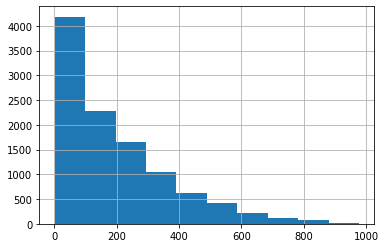

In [62]:
y_train.hist()

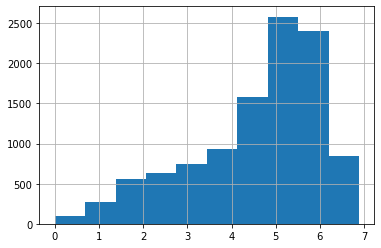

In [61]:
np.log(y_train).hist()

In [57]:
from sklearn.metrics import make_scorer
def rmsle(y, y_,convertExp=False):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v +1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v +1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))
rmsle_scorer = make_scorer(rmsle, greater_is_better=True)

In [63]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
X_train = df.drop('count',axis=1)
y_train = df['count']

# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()
lin_reg_scores = cross_val_score(lin_reg, X_train, y_train,cv=5)
lin_reg_scores.mean()

# SGD Regresor
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor()
sgd_reg_scores = cross_val_score(sgd_reg, X_train, y_train,cv=5)
sgd_reg_scores.mean()

# 다항회귀
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
lin_reg = LinearRegression()
poly_reg_scores = cross_val_score(lin_reg, X_poly, y_train, scoring=“neg_mean_squared_error”,cv=5)
poly_reg_scores.mean()

# Ridge, Lasso, ElasticNet
from sklearn.linear_model import Ridge, Lasso, ElasticNet
ridge_reg = Ridge()
lasso_reg = Lasso()
elastic_net =ElasticNet()
for reg in [ridge_reg,lasso_reg,elastic_net]:
  reg_scores = cross_val_score(reg, X_train, y_train, scoring=“neg_mean_squared_error”,cv=5).mean()
  print(reg.__class__.__name__, reg_scores)

# 랜덤 포레스트 모델
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
scores = cross_val_score(forest_reg, X_train, y_train, scoring=“neg_mean_squared_error”, cv=5).mean()
scores 

SyntaxError: ignored

NameError: ignored

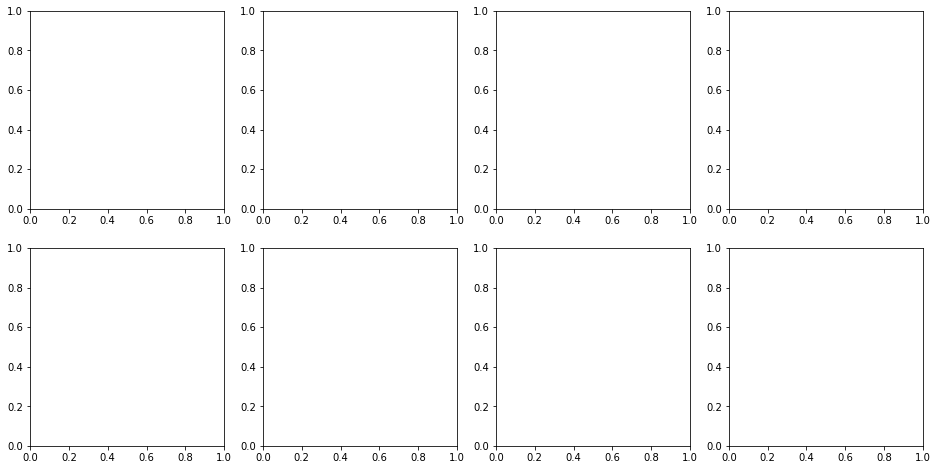

In [64]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
c_feature = ['year','month','season','weather','day','hour','holiday','workingday']

for i, feature in enumerate(c_feature):
    row = int(i/4)
    col = i%4
    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col])


In [ ]:
y_val

1190    241
1790    281
4471    499
1597     49
2705    381
       ... 
2595     17
4101     64
3743     84
9007    488
9516    349
Name: count, Length: 2128, dtype: int64

array([ 66, 103, 117, ..., 201, 455, 336])

In [ ]:
np.equal(y_val, y_valpre)

1190    False
1790    False
4471    False
1597    False
2705    False
        ...  
2595    False
4101    False
3743    False
9007    False
9516    False
Name: count, Length: 2128, dtype: bool

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train)
train_data_scaled = scaler.transform(train)
df=pd.DataFrame(train_data_scaled,columns=['datetime', 'season', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed', 'count', 'year', 'month', 'hour', 'dayofweek', 'weather_'])

In [ ]:
df=pd.DataFrame(train_data_scaled,columns=['datetime', 'season', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed', 'count', 'year', 'month', 'hour', 'dayofweek', 'weather_'])

In [ ]:
scaler.fit(test)
test_data_scaled = scaler.transform(test)
dftest=pd.DataFrame(test_data_scaled,columns=['datetime', 'season', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed', 'year', 'month', 'hour', 'dayofweek', 'weather_'])

In [ ]:
X=df.drop('count',axis=1).copy()
y=df['count'].copy()
X_test = test.copy()
from sklearn.model_selection import train_test_split
X_train, X_val, y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
X=train.drop('count',axis=1).drop()
y=train['count'].copy()
y_train=y_train.values.reshape(-1,1)
X_test = test.copy()
from sklearn.model_selection import train_test_split
X_train, X_val, y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

ValueError: ignored

In [ ]:
y_val=y_val.values.reshape(-1,1)


In [ ]:
y_val_pred=lin_reg.predict(X_val)
lin_reg.score(y_val,y_val_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

In [ ]:
type(y_val)

pandas.core.series.Series

In [ ]:
y_val.shape

(2128,)

In [ ]:
np.reshape(y_val,(-1,1))

ValueError: ignored

In [ ]:
lin_reg.score(y_val,y_val_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

In [ ]:
outlier_idx = get_outlier(df=test, column='windspeed')
outlier_idx
outlier_idx1 = get_outlier(df=test,column='humidity')
outlier_idx1
test.drop(outlier_idx, axis=0, inplace=True)
test.drop(outlier_idx1, axis=0, inplace=True)

In [ ]:
test['year']=test['datetime'].dt.year
test['month']=test['datetime'].dt.month
test['hour']=test['datetime'].dt.hour
test['dayofweek']=test['datetime'].dt.dayofweek

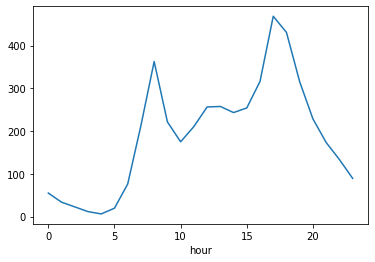

In [ ]:
th['count'].mean().plot() #출, 퇴근?

In [ ]:
th['count'].mean() #1.17시 2.8시 퇴근, 출근 

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: count, dtype: float64

# 이상치 제거 

In [ ]:
train['weather_']= np.where(train['weather']==1, 1, 0)
train.drop('weather',axis=1,inplace=True)

In [ ]:
train1.drop('weather',axis=1,inplace=True)

In [ ]:
train1.windspeed

In [ ]:
train1

,datetime,season,holiday,workingday,temp,humidity,windspeed,count,year,month,hour,weather_
0,2011-01-01 00:00:00,1,0,0,9.84,81,0.0000,16,2011,1,0,1
1,2011-01-01 01:00:00,1,0,0,9.02,80,0.0000,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,9.02,80,0.0000,32,2011,1,2,1
3,2011-01-01 03:00:00,1,0,0,9.84,75,0.0000,13,2011,1,3,1
4,2011-01-01 04:00:00,1,0,0,9.84,75,0.0000,1,2011,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,15.58,50,26.0027,336,2012,12,19,1
10882,2012-12-19 20:00:00,4,0,1,14.76,57,15.0013,241,2012,12,20,1
10883,2012-12-19 21:00:00,4,0,1,13.94,61,15.0013,168,2012,12,21,1
10884,2012-12-19 22:00:00,4,0,1,13.94,61,6.0032,129,2012,12,22,1


In [ ]:
q1=train1['windspeed'].quantile(0.25)
q3=train1['windspeed'].quantile(0.75)
iqr = q3-q1
n=(train1.windspeed<q1-(1.5*iqr))|(train1.windspeed>q3+(1.5*iqr))
n.value_counts()

False    10659
True       227
Name: windspeed, dtype: int64

In [ ]:
train1

,datetime,season,holiday,workingday,temp,humidity,windspeed,count,year,month,hour,weather_,n
0,2011-01-01 00:00:00,1,0,0,9.84,81,0.0000,16,2011,1,0,1,False
1,2011-01-01 01:00:00,1,0,0,9.02,80,0.0000,40,2011,1,1,1,False
2,2011-01-01 02:00:00,1,0,0,9.02,80,0.0000,32,2011,1,2,1,False
3,2011-01-01 03:00:00,1,0,0,9.84,75,0.0000,13,2011,1,3,1,False
4,2011-01-01 04:00:00,1,0,0,9.84,75,0.0000,1,2011,1,4,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,15.58,50,26.0027,336,2012,12,19,1,False
10882,2012-12-19 20:00:00,4,0,1,14.76,57,15.0013,241,2012,12,20,1,False
10883,2012-12-19 21:00:00,4,0,1,13.94,61,15.0013,168,2012,12,21,1,False
10884,2012-12-19 22:00:00,4,0,1,13.94,61,6.0032,129,2012,12,22,1,False


In [ ]:
index=train1[train1['n']==True].index
train1.drop(index,axis=0)

In [ ]:
train1.drop(index,axis=0)

,datetime,season,holiday,workingday,temp,humidity,windspeed,count,year,month,hour,weather_,n
0,2011-01-01 00:00:00,1,0,0,9.84,81,0.0000,16,2011,1,0,1,False
1,2011-01-01 01:00:00,1,0,0,9.02,80,0.0000,40,2011,1,1,1,False
2,2011-01-01 02:00:00,1,0,0,9.02,80,0.0000,32,2011,1,2,1,False
3,2011-01-01 03:00:00,1,0,0,9.84,75,0.0000,13,2011,1,3,1,False
4,2011-01-01 04:00:00,1,0,0,9.84,75,0.0000,1,2011,1,4,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,15.58,50,26.0027,336,2012,12,19,1,False
10882,2012-12-19 20:00:00,4,0,1,14.76,57,15.0013,241,2012,12,20,1,False
10883,2012-12-19 21:00:00,4,0,1,13.94,61,15.0013,168,2012,12,21,1,False
10884,2012-12-19 22:00:00,4,0,1,13.94,61,6.0032,129,2012,12,22,1,False


In [ ]:
# 이상치 삭제 함수
def get_outlier(df=None, column=None):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 -q1
  outlier_idx  = df[column][(df[column] < q1 - (1.5 * iqr)) | (df[column] > q3 + (1.5 * iqr))].index
  return outlier_idx
outlier_idx = get_outlier(df=train1, column='windspeed')
outlier_idx
outlier_idx1 = get_outlier(df=train1,column='humidity')
outlier_idx1
train1.drop(outlier_idx, axis=0, inplace=True)
train1.drop(outlier_idx1, axis=0, inplace=True)

In [ ]:
train1.drop('datetime',axis=1,inplace=True)

In [ ]:
train1

,season,holiday,workingday,temp,humidity,windspeed,count,year,month,hour,weather_
0,1,0,0,9.84,81,0.0000,16,2011,1,0,1
1,1,0,0,9.02,80,0.0000,40,2011,1,1,1
2,1,0,0,9.02,80,0.0000,32,2011,1,2,1
3,1,0,0,9.84,75,0.0000,13,2011,1,3,1
4,1,0,0,9.84,75,0.0000,1,2011,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,15.58,50,26.0027,336,2012,12,19,1
10882,4,0,1,14.76,57,15.0013,241,2012,12,20,1
10883,4,0,1,13.94,61,15.0013,168,2012,12,21,1
10884,4,0,1,13.94,61,6.0032,129,2012,12,22,1


In [ ]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10638 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10638 non-null  int64  
 1   holiday     10638 non-null  int64  
 2   workingday  10638 non-null  int64  
 3   temp        10638 non-null  float64
 4   humidity    10638 non-null  int64  
 5   windspeed   10638 non-null  float64
 6   count       10638 non-null  int64  
 7   year        10638 non-null  int64  
 8   month       10638 non-null  int64  
 9   hour        10638 non-null  int64  
 10  weather_    10638 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 997.3 KB


In [ ]:
train_data_scaled=pd.DataFrame(train_data_scaled)

In [ ]:
train_data_scaled

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.224490,0.793478,0.000000,0.015369,0.0,0.0,0.000000,1.0
1,0.0,0.0,0.0,0.204082,0.782609,0.000000,0.039959,0.0,0.0,0.043478,1.0
2,0.0,0.0,0.0,0.204082,0.782609,0.000000,0.031762,0.0,0.0,0.086957,1.0
3,0.0,0.0,0.0,0.224490,0.728261,0.000000,0.012295,0.0,0.0,0.130435,1.0
4,0.0,0.0,0.0,0.224490,0.728261,0.000000,0.000000,0.0,0.0,0.173913,1.0
...,...,...,...,...,...,...,...,...,...,...,...
10633,1.0,0.0,1.0,0.367347,0.456522,0.838772,0.343238,1.0,1.0,0.826087,1.0
10634,1.0,0.0,1.0,0.346939,0.532609,0.483899,0.245902,1.0,1.0,0.869565,1.0
10635,1.0,0.0,1.0,0.326531,0.576087,0.483899,0.171107,1.0,1.0,0.913043,1.0
10636,1.0,0.0,1.0,0.326531,0.576087,0.193646,0.131148,1.0,1.0,0.956522,1.0


In [ ]:
train1.drop('n',axis=1,inplace=True)

In [ ]:
get_outlier(train1,'humidity')

Int64Index([1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101,
            1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112],
           dtype='int64')

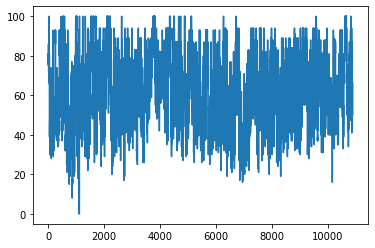

In [ ]:
train1['humidity'].plot()

In [ ]:
n.value_counts()

False    10864
True        22
Name: humidity, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(train,test,test_size=0.2,random_state=42)

ValueError: ignored